In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.interpolate
import scipy.ndimage
import scipy.signal

In [3]:
data = np.load('../Data/2frames.npz')
frame1 = data['data'][:,:,0]
frame2 = data['data'][:,:,1]

In [4]:
strip_idx = np.linspace(start=0,stop=frame1.shape[0],num=65)
print strip_idx

[    0.    16.    32.    48.    64.    80.    96.   112.   128.   144.
   160.   176.   192.   208.   224.   240.   256.   272.   288.   304.
   320.   336.   352.   368.   384.   400.   416.   432.   448.   464.
   480.   496.   512.   528.   544.   560.   576.   592.   608.   624.
   640.   656.   672.   688.   704.   720.   736.   752.   768.   784.
   800.   816.   832.   848.   864.   880.   896.   912.   928.   944.
   960.   976.   992.  1008.  1024.]


In [5]:
idx = 0
t_pad = b_pad = max_pad = 30
t_line = strip_idx[idx] - max_pad
if t_line < 0:
    t_pad = max_pad - (max_pad-strip_idx[idx])
    

b_line = strip_idx[idx+1] + max_pad
b_pad = max_pad
if b_line > frame1.shape[0]:
    b_pad = max_pad - (b_line - frame1.shape[0])

print t_pad
print b_pad


0.0
30


In [6]:
strip = frame1[strip_idx[idx]:strip_idx[idx+1],100:-100] #First 16 rows of frame 0
template = frame2[strip_idx[idx] - t_pad:strip_idx[idx+1]+b_pad,:] #First 46 rows of fame 0 - no padding

In [7]:
print 'strip top:{0}'.format(strip_idx[idx])
print 'strip bottom:{0}'.format(strip_idx[idx+1])
print 'template top:{0}'.format(strip_idx[idx]-t_pad)
print 'template bottom:{0}'.format(strip_idx[idx+1]+b_pad)

strip top:0.0
strip bottom:16.0
template top:0.0
template bottom:46.0


In [8]:
print strip.shape
print template.shape

(16, 800)
(46, 1000)


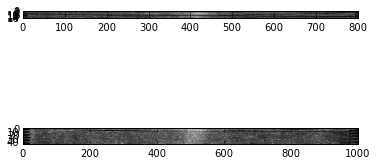

In [9]:
plt.subplot(211)
plt.imshow(strip,cmap=plt.get_cmap('gray'))

plt.subplot(212)
plt.imshow(template,cmap=plt.get_cmap('gray'))

In [10]:
strip = strip - strip.mean()
template = template - template.mean()

In [11]:
corr = scipy.signal.correlate2d(template,strip,mode='same')
y,x = np.unravel_index(np.argmax(corr),corr.shape)

In [12]:
print y,x

7 499


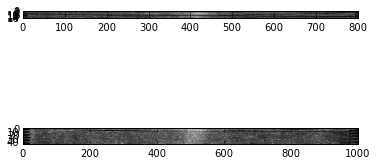

In [13]:
plt.subplot(211)
plt.imshow(strip,cmap=plt.get_cmap('gray'))

plt.subplot(212)
plt.imshow(template,cmap=plt.get_cmap('gray'))

In [14]:
shift_y = y - t_pad - ((template.shape[0] - (t_pad+b_pad))/2)
print shift_y

-1.0


In [15]:
strip_center= (strip_idx[idx+1] - strip_idx[idx])/2
print strip_center

8.0
